In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns =['Unnamed: 0', 'MA_Six_Months', 'MA_One_Year'], inplace = True)
stocks

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $
0,1997-05-15,Amazon,1443120000,0.0979,0.1219,0.1250,0.0964
1,1997-05-16,Amazon,294000000,0.0865,0.0984,0.0990,0.0854
2,1997-05-19,Amazon,122136000,0.0854,0.0880,0.0885,0.0812
3,1997-05-20,Amazon,109344000,0.0818,0.0865,0.0875,0.0818
4,1997-05-21,Amazon,377064000,0.0714,0.0818,0.0823,0.0688
...,...,...,...,...,...,...,...
40164,2024-11-08,Tesla,204782800,321.2200,299.1400,328.7100,297.6600
40165,2024-11-11,Tesla,210521600,350.0000,346.3000,358.6400,336.0000
40166,2024-11-12,Tesla,155726000,328.4900,342.7400,345.8400,323.3100
40167,2024-11-13,Tesla,125405600,330.2400,335.8500,344.6000,322.5000


In [3]:
# Dropping columns of non-numerical value
stocks = stocks[['Volume', 'Close in $', 'Open in $', 'High in $', 'Low in $']]
stocks

,Volume,Close in $,Open in $,High in $,Low in $
0,1443120000,0.0979,0.1219,0.1250,0.0964
1,294000000,0.0865,0.0984,0.0990,0.0854
2,122136000,0.0854,0.0880,0.0885,0.0812
3,109344000,0.0818,0.0865,0.0875,0.0818
4,377064000,0.0714,0.0818,0.0823,0.0688
...,...,...,...,...,...
40164,204782800,321.2200,299.1400,328.7100,297.6600
40165,210521600,350.0000,346.3000,358.6400,336.0000
40166,155726000,328.4900,342.7400,345.8400,323.3100
40167,125405600,330.2400,335.8500,344.6000,322.5000


In [4]:
clusters = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in clusters] # Defines k-means clusters in the range assigned above.

In [5]:
score = [kmeans[i].fit(stocks).score(stocks) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.95958017134236e+21,
 -7.384478542214996e+20,
 -4.164452488750556e+20,
 -2.6487105126373956e+20,
 -1.871489550709714e+20,
 -1.4245437872971006e+20,
 -1.1113213306546297e+20,
 -8.657497518374388e+19,
 -6.695503679140766e+19]

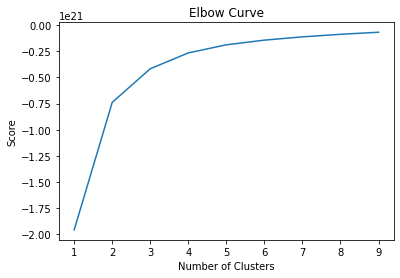

In [6]:
# Plot the elbow curve using PyLab.

pl.plot(clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [7]:
# There's a jump from 2 to 3 on the x axis, but after that, the curve straightens out. 
# That means the optimal number of clusters should be 4

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [9]:
# Fit the k-means object to the data.

kmeans.fit(stocks)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [10]:
stocks['clusters'] = kmeans.fit_predict(stocks)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/t8/xh28456s3kngn8qzvmt25b700000gn/T/ipykernel_46012/2159357975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['clusters'] = kmeans.fit_predict(stocks)


In [11]:
stocks.head(20)

,Volume,Close in $,Open in $,High in $,Low in $,clusters
0,1443120000,0.0979,0.1219,0.1250,0.0964,1
1,294000000,0.0865,0.0984,0.0990,0.0854,2
2,122136000,0.0854,0.0880,0.0885,0.0812,0
3,109344000,0.0818,0.0865,0.0875,0.0818,0
4,377064000,0.0714,0.0818,0.0823,0.0688,2
5,235536000,0.0698,0.0719,0.0724,0.0656,0
6,318744000,0.0750,0.0703,0.0760,0.0667,2
7,173952000,0.0792,0.0755,0.0823,0.0729,0
8,91488000,0.0766,0.0812,0.0818,0.0766,0
9,69456000,0.0753,0.0771,0.0771,0.0740,0


In [12]:
stocks['clusters'].value_counts()

0    34732
2     4587
1      850
Name: clusters, dtype: int64

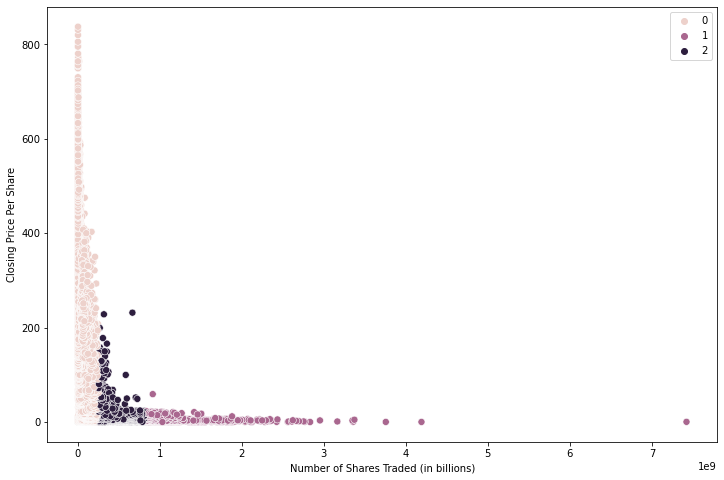

In [13]:
# Plot the clusters for the "Volume" and "Close/Last in $" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = stocks['Volume'] , y = stocks['Close in $'], hue = kmeans.labels_, s = 50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Shares Traded (in billions)') # Label x-axis.
plt.ylabel('Closing Price Per Share') # Label y-axis.
x_ticks = np.arange(0, 1500000000, 100000000)
y_ticks = np.arange(0, 900, 100)
plt.show()

In [14]:
# The first cluster in salmon colored (coded as 0) gathers more data points relating to dates with a higher closing price yet lower number of shares traded 
# The last cluster in purple (coded as 1) gathers more data points relating to dates with a lower closing price yet relative higher number of shares traded 

In [15]:
stocks.loc[stocks['clusters'] == 2, 'cluster'] = 'dark purple'
stocks.loc[stocks['clusters'] == 1, 'cluster'] = 'purple'
stocks.loc[stocks['clusters'] == 0, 'cluster'] = 'salmon colored'

In [16]:
stocks.groupby('cluster').agg({'Volume':['mean', 'median'], 
                         'Close in $':['mean', 'median']})

Volume               Close in $          
                        mean        median       mean    median
cluster                                                        
dark purple     4.330951e+08  3.911000e+08   7.552483   1.52680
purple          1.219091e+09  1.066873e+09   4.292588   3.26605
salmon colored  7.222705e+07  5.698350e+07  80.867775  26.14000

In [17]:
# The average closing price per share received for the purple cluster group is approximately $4 dollars with the average volume of shares over 1 billon shares
# The average closing price per share received for the salmon colored cluster group is approximately $80 dollars with the average volume of shares over 70 million shares
# Supports hypothesis: If number of shares traded increases, the closing price decreases.